In [1]:
# An example of how to generate a Coulomb matrices (CM)
# for glycidol using DScribe and Atomic Simulation Environment (ASE)
# 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from dscribe.descriptors import CoulombMatrix
from ase.build import molecule
from ase.io import read
# This code block shows the default parameters for generating CMs 
# in DScribe. By default, a sorted CM is generate with L2-norm 
# sorted rows and columns. n_atoms_max is a parameter that helps
# with padding, for one molecule it is the number of atoms in 
# the molecule.
print('Sorted CM')
cm = CoulombMatrix(n_atoms_max=11)

# Generate the ethanol molecule using ASE

mol = read('../glycidol.xyz')
print(type(mol))

# Create CM output for the system
cm_mol = cm.create(mol)

# Print the sorted CM and it's corresponding shape
print("Flattened shape of the sorted CM", cm_mol.shape)
print(cm_mol)

# Set the parameters, sigma and seed, of the unsorted CM
print('\nUnsorted CM')
cm_unsrtd=CoulombMatrix(n_atoms_max=11,permutation='none')

# Generate the unsorted CM for mol
cm_unsrtd_mol = cm_unsrtd.create(mol)

# Print the unsorted CM and it's corresponding shape
print("Flattened shape of the unsorted CM", cm_unsrtd_mol.shape)
print(cm_unsrtd_mol)

# Set the parameters of the eigenspectrum representation
print('\nEigenspectrum')
cm_eigen=CoulombMatrix(n_atoms_max=11,permutation='eigenspectrum')

# Generate the eigenspectrum representation of the CM
cm_eigen_mol = cm_eigen.create(mol)

# Print the eigenspectrum and it's corresponding shape
print("Flattened shape of the eigenspectrum", cm_eigen_mol.shape)
print(cm_eigen_mol)

# Set the parameters, sigma and seed, of the randomly sorted CM
# Examine how sigma effects the sorting of the randomly sorted CM
print('\nRandomly sorted CM')
cm_random=CoulombMatrix(n_atoms_max=11,permutation='random',
                        sigma=1e-3,seed=42)

# Generate the randomly sorted CM for mol
cm_random_mol = cm_random.create(mol)

# Print the randomly sorted CM and it's corresponding shape
print("Flattened shape of the randomly sorted CM", 
      cm_random_mol.shape)
print(cm_random_mol)

Sorted CM
<class 'ase.atoms.Atoms'>
Flattened shape of the sorted CM (121,)
[73.51669472 18.03272067 33.40883844 19.4960174  33.53454721  1.8825876
  3.69094531  3.17177624  2.58945169  3.70840617  3.70965431 18.03272067
 73.51669472 20.20185564 33.74806776 12.75390244  8.22822194  3.28646884
  3.89963397  3.91033081  1.93682077  1.7759813  33.40883844 20.20185564
 36.8581052  24.14447266 23.86856045  1.87332169  5.54870615  2.79606839
  2.80428398  2.67316935  2.6864429  19.4960174  33.74806776 24.14447266
 36.8581052  13.79245191  3.09339002  2.76091578  5.48019693  5.48239862
  2.12427327  1.69915896 33.53454721 12.75390244 23.86856045 13.79245191
 36.8581052   1.33176393  2.67711787  1.94743408  2.16346297  5.543068
  5.5408146   1.8825876   8.22822194  1.87332169  3.09339002  1.33176393
  0.5         0.29493181  0.45061053  0.4321271   0.21223769  0.18751068
  3.69094531  3.28646884  5.54870615  2.76091578  2.67711787  0.29493181
  0.5         0.34143882  0.34773764  0.31882871  0

In [2]:
# Generate the unsorted CM of glycidol using a seaborn heatmap
print(mol.get_chemical_symbols())
print("Double check ordering", mol)
ds_CMdf=pd.DataFrame(cm_unsrtd_mol.reshape(11,11),columns=mol.get_chemical_symbols(),index=mol.get_chemical_symbols())
srted_ds_CMdf=ds_CMdf.loc[['O', 'C','H'],['O', 'C','H']]

['H', 'O', 'H', 'C', 'H', 'H', 'C', 'H', 'C', 'H', 'O']
Double check ordering Atoms(symbols='HOHCH2CHCHO', pbc=False)


In [3]:
srted_ds_CMdf

,O,O,C,C,C,H,H,H,H,H,H
O,73.516695,18.032721,33.748068,20.201856,12.753902,8.228222,3.910331,3.286469,3.899634,1.936821,1.775981
O,18.032721,73.516695,19.496017,33.408838,33.534547,1.882588,2.589452,3.690945,3.171776,3.708406,3.709654
C,33.748068,19.496017,36.858105,24.144473,13.792452,3.093390,5.482399,2.760916,5.480197,2.124273,1.699159
C,20.201856,33.408838,24.144473,36.858105,23.868560,1.873322,2.804284,5.548706,2.796068,2.673169,2.686443
C,12.753902,33.534547,13.792452,23.868560,36.858105,1.331764,2.163463,2.677118,1.947434,5.543068,5.540815
H,8.228222,1.882588,3.093390,1.873322,1.331764,0.500000,0.432127,0.294932,0.450611,0.212238,0.187511
H,3.910331,2.589452,5.482399,2.804284,2.163463,0.432127,0.500000,0.347738,0.561214,0.382589,0.271731
H,3.286469,3.690945,2.760916,5.548706,2.677118,0.294932,0.347738,0.500000,0.341439,0.318829,0.393316
H,3.899634,3.171776,5.480197,2.796068,1.947434,0.450611,0.561214,0.341439,0.500000,0.313624,0.243729
H,1.936821,3.708406,2.124273,2.673169,5.543068,0.212238,0.382589,0.318829,0.313624,0.500000,0.548553


In [4]:
cm_1 = srted_ds_CMdf.to_numpy().reshape(11,11)
row_norm = np.array(sorted([(np.linalg.norm(i),idx) for idx,i in enumerate(cm_1)],reverse=True))[:,1].astype(int)
column_norm = np.array(sorted([(np.linalg.norm(i),idx) for idx,i in enumerate(cm_1[row_norm].T)],reverse=True))[:,1].astype(int)
mysrt=cm_1[row_norm][column_norm]

In [5]:
mysrt == cm_mol.reshape(11,11)

array([[ True,  True, False, False, False, False, False, False, False,
        False, False],
       [ True,  True, False, False, False, False, False, False, False,
        False, False],
       [False, False,  True,  True, False, False, False, False, False,
        False, False],
       [False, False,  True,  True, False, False, False, False, False,
        False, False],
       [False, False, False, False,  True,  True, False, False, False,
         True,  True],
       [False, False, False, False,  True,  True, False, False, False,
         True,  True],
       [False, False, False, False, False, False, False,  True, False,
        False, False],
       [False, False, False, False, False, False, False, False,  True,
        False, False],
       [False, False, False, False, False, False,  True, False, False,
        False, False],
       [False, False, False, False,  True,  True, False, False, False,
         True,  True],
       [False, False, False, False,  True,  True, False, Fal

In [6]:
srted_ds_CMdf.to_numpy()==mysrt

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  Tr

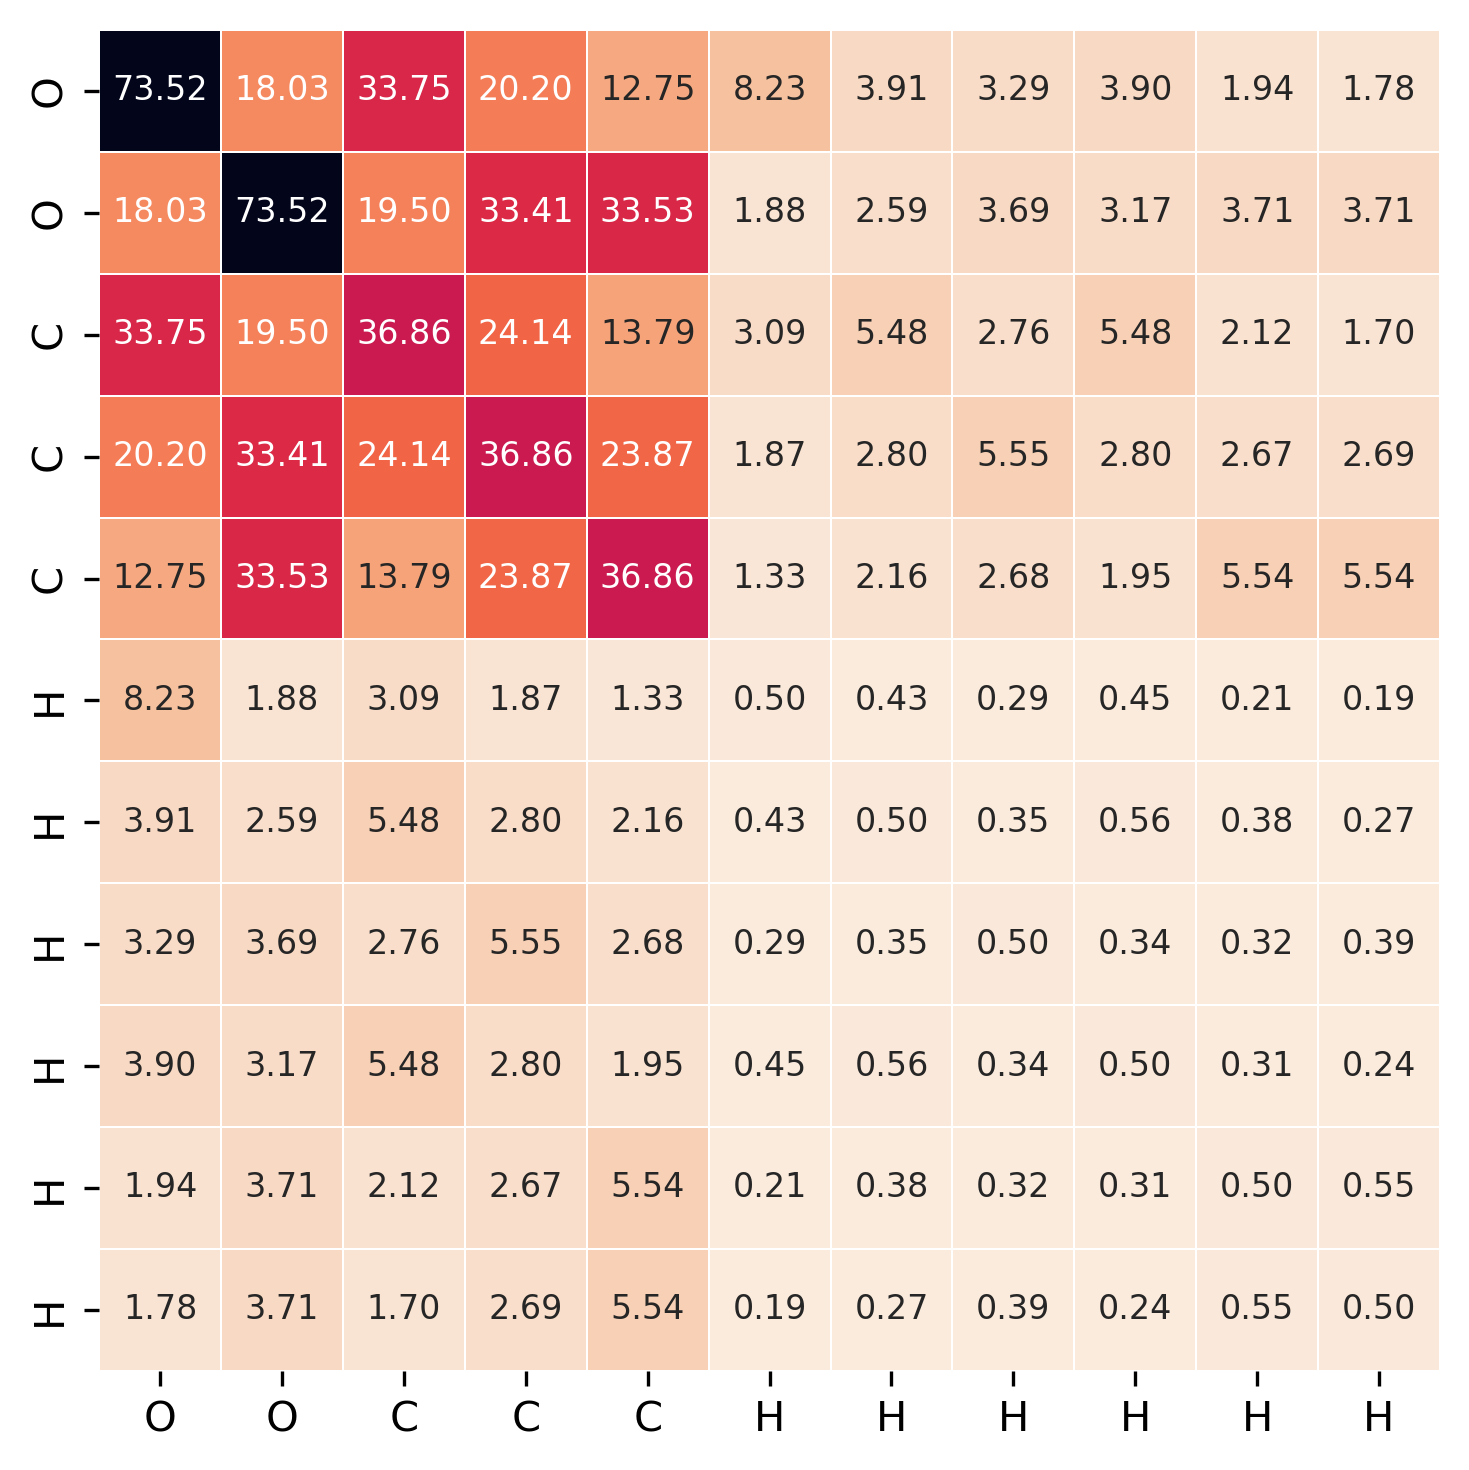

In [7]:
plt.figure(figsize=(5,5),dpi=300)
sns.heatmap(srted_ds_CMdf,cmap=sns.cm.rocket_r,cbar=False,square=True,annot=True, fmt='.2f',linewidths=0.1, annot_kws={'fontsize':8})
plt.tight_layout()
plt.savefig('glycidol_CM.png',dpi=300)
plt.savefig('glycidol_CM.svg',dpi=300)
plt.show()

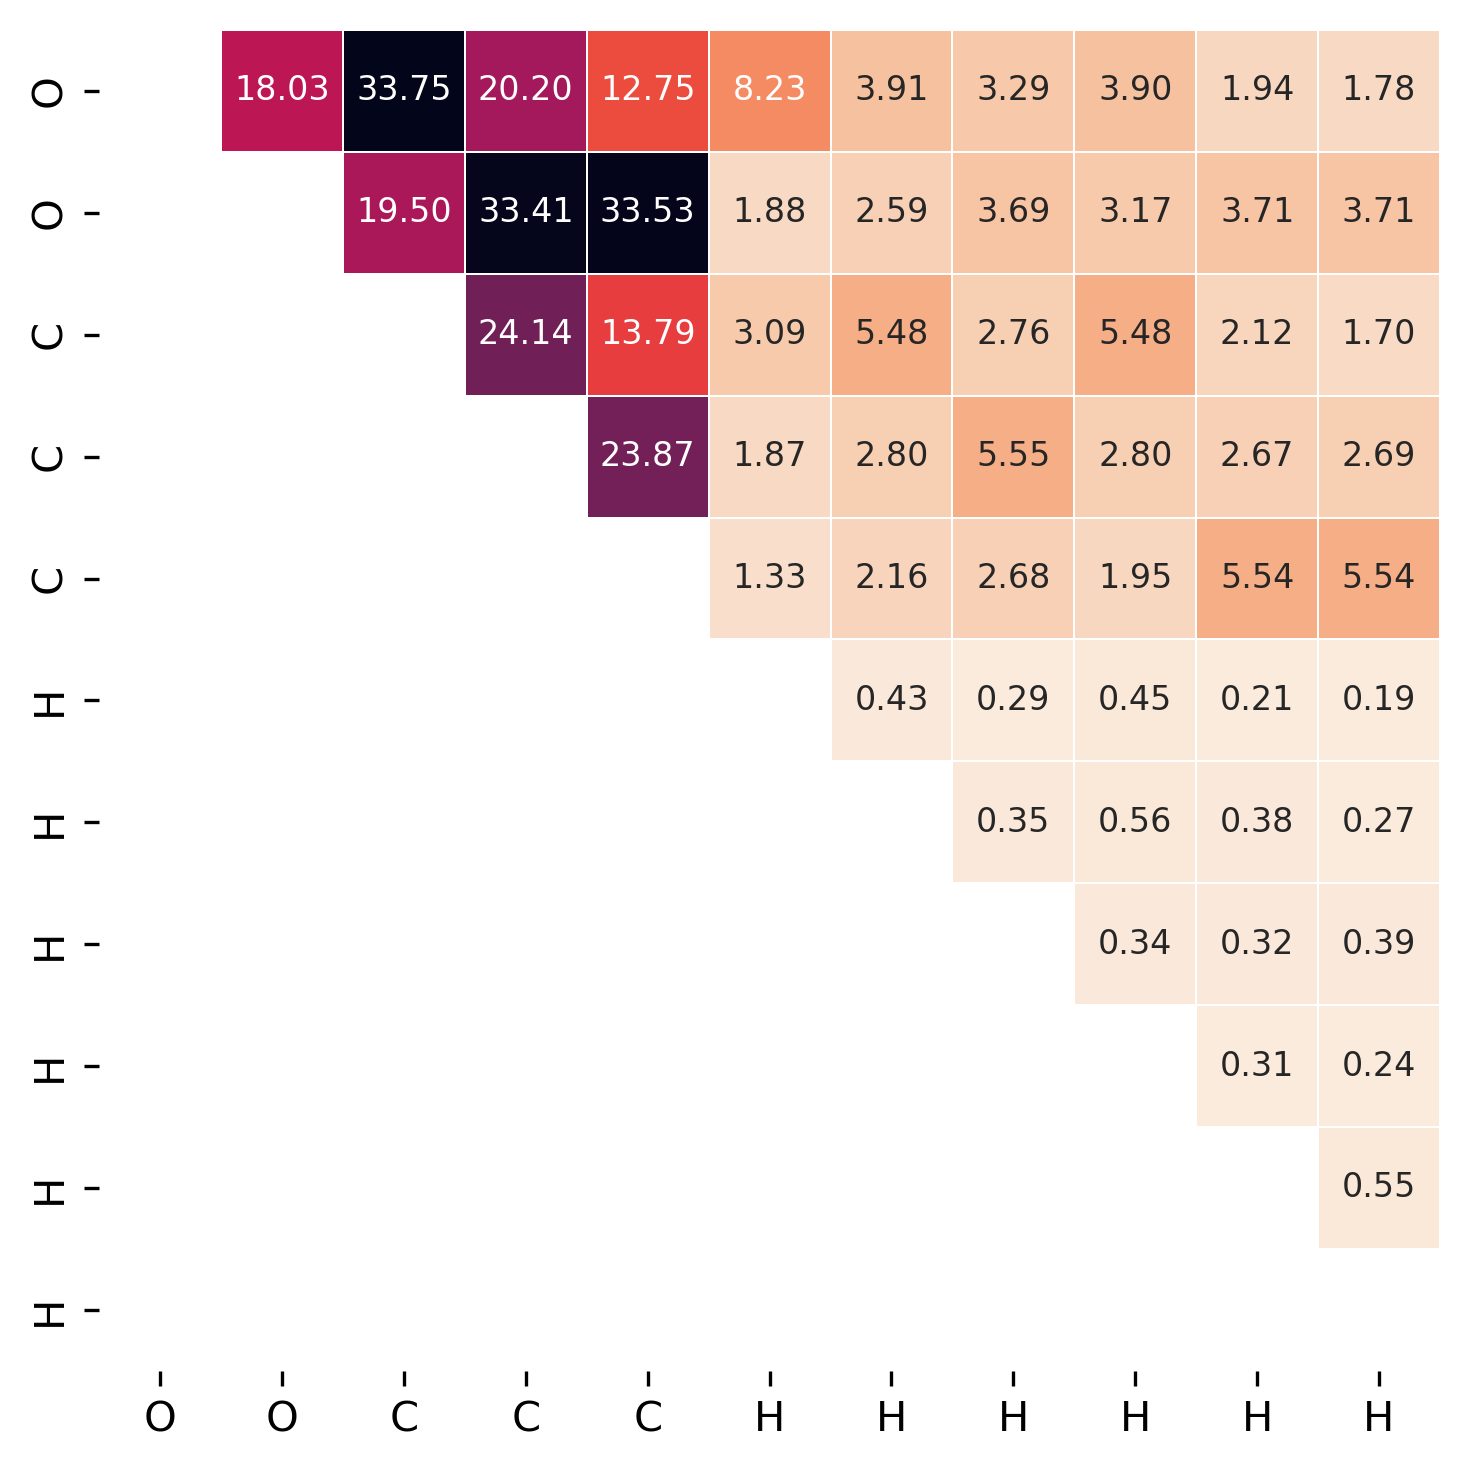

In [16]:
# Getting the Upper Triangle of the co-relation matrix



plt.figure(figsize=(5,5),dpi=300)

# Create a mask
mask = np.tril(np.ones_like(srted_ds_CMdf, dtype=bool))
np.fill_diagonal(mask, True)


sns.heatmap(srted_ds_CMdf, mask=mask,cmap=sns.cm.rocket_r,cbar=False,square=True,annot=True, fmt='.2f',linewidths=0.1, annot_kws={'fontsize':8})
plt.tight_layout()

In [ ]:
for i in range(11):
    for j in range(11):
        if i==j:
            print(matrix[i][j])

In [ ]:
(len(mol.get_atomic_numbers())*(len(mol.get_atomic_numbers())+1))/2

In [ ]:
cm_unsrtd_mol.reshape(11,11)

In [ ]:
idx = 0
for idi, Zi in enumerate(mol.get_atomic_numbers()):
    for idj, Zj in enumerate(mol.get_atomic_numbers()):
        if idi != idj:
            dist = mol.get_all_distances()
            my_cm = (Zi*Zj)/dist[idi,idj]
        else:
            my_cm = 0.5 * Zi**2.4
        print(my_cm==cm_unsrtd_mol[idx])
        idx+=1